<a href="https://colab.research.google.com/github/rk2026/civil/blob/main/soil_tability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install rasterio

#Soil Stability Analysis

"Soil Stability Analysis" defenation?
Soil Stability Analysis
Soil stability analysis is the process of evaluating the stability and safety of soil structures, such as slopes, embankments, and foundations. This analysis is crucial in civil engineering, geotechnical engineering, and environmental studies to prevent landslides, subsidence, and other ground-related failures.

Key Concepts:
Slope Stability:

Involves assessing the potential for soil or rock slopes to withstand various forces without collapsing. It's critical in the design and maintenance of slopes along highways, embankments, and other structures.

Shear Strength:

The resistance of soil to shearing forces. It is an essential parameter in determining the stability of soil and rock masses. Shear strength is influenced by soil properties such as cohesion, friction angle, and moisture content.

Factor of Safety (FOS):

A numerical value used to express the stability of a slope. It is the ratio of resisting forces (strength) to driving forces (stresses). A FOS greater than 1 indicates stability, while a FOS less than 1 indicates potential failure.

Stability Methods:

Various methods are used for soil stability analysis, such as:

Limit Equilibrium Methods (LEM): Traditional techniques that assume a potential slip surface and calculate forces and moments acting on it. Methods like Bishop's Simplified Method, Morgenstern-Price Method, and others fall into this category.

Finite Element Method (FEM): A numerical technique that provides detailed analysis by modeling the soil's behavior under different loading conditions.

Applications:
Infrastructure Development:

Ensuring the stability of slopes and foundations in construction projects like roads, bridges, and buildings.

Land Use Planning:

Assessing potential landslide risks in areas proposed for development to ensure the safety of communities.

Environmental Protection:

Preventing soil erosion and landslides that can lead to environmental degradation and loss of habitat.

Example in Practice:
In our code, the Bishop's Simplified Method is used for slope stability analysis, which calculates the Factor of Safety (FOS) for a given slope by evaluating the resisting and driving forces along potential slip surfaces.

1. Introduction to Digital Elevation Models (DEMs)
What is a DEM?

A DEM is a 3D representation of a terrain's surface created from terrain elevation data. It is typically stored as a raster grid where each cell represents the elevation at that point.

2. Loading and Visualizing DEMs
Loading DEM Data:

Use of libraries like rasterio to read GeoTIFF files containing DEM data.

Explanation of the load_dem function, which reads DEM data into a NumPy array and returns it along with the raster dataset object.

In [ ]:
def load_dem(dem_path: str) -> Tuple[np.ndarray, rasterio.DatasetReader]:
    """
    Load Digital Elevation Model (DEM) from a GeoTIFF file.
    Args:
        dem_path (str): Path to the DEM file
    Returns:
        Tuple of numpy array (elevation data) and rasterio dataset
    """
    try:
        dem = rasterio.open(dem_path)
        dem_array = dem.read(1)
        return dem_array, dem
    except Exception as e:
        print(f"Error loading DEM: {e}")
        raise


Visualizing DEM Data:

Use of matplotlib to create visualizations of DEM data.

The plot_dem_and_slope function creates side-by-side visualizations of the DEM and the slope calculated from the DEM.

In [ ]:
def plot_dem_and_slope(dem_array: np.ndarray, slope_array: np.ndarray):
    """
    Create visualizations of the DEM and slope.
    Args:
        dem_array (np.ndarray): Digital Elevation Model
        slope_array (np.ndarray): Calculated slope array
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # DEM plot
    im1 = ax1.imshow(dem_array, cmap='terrain')
    ax1.set_title('Digital Elevation Model')
    plt.colorbar(im1, ax=ax1, label='Elevation')

    # Slope plot
    im2 = ax2.imshow(slope_array, cmap='viridis')
    ax2.set_title('Slope Angle')
    plt.colorbar(im2, ax=ax2, label='Slope (degrees)')

    plt.tight_layout()
    plt.show()

3. Calculating Slope
Slope Calculation:

Use of Sobel operators to calculate the gradient of the DEM in the x and y directions.

Explanation of the calculate_slope function that uses these gradients to compute the slope in degrees.

In [ ]:
def calculate_slope(dem_array: np.ndarray) -> np.ndarray:
    """
    Calculate slope using Sobel operators.
    Args:
        dem_array (np.ndarray): Digital Elevation Model array
    Returns:
        np.ndarray: Slope array in degrees
    """
    # Compute slopes in x and y directions
    dx = sobel(dem_array, axis=1)
    dy = sobel(dem_array, axis=0)

    # Calculate slope magnitude
    slope = np.arctan(np.sqrt(dx**2 + dy**2)) * 180 / np.pi
    return slope


4. Slope Stability Analysis using Bishop's Method
Bishop's Simplified Method:

Introduction to the theoretical basis of Bishop's method for slope stability analysis.

Explanation of the key parameters: cohesion, friction angle, unit weight of the soil, etc.

Explanation of the bishop_method function, which implements a simplified version of Bishop's method.

In [ ]:
def bishop_method(
    dem_array: np.ndarray,
    transform: rasterio.Affine,
    center_col: int,
    center_row: int,
    radius_pixels: float,
    soil_params: Tuple[float, float, float],
    num_slices: int = 20
) -> float:
    """
    Implement Bishop's simplified method for slope stability analysis.
    Args:
        dem_array (np.ndarray): Digital Elevation Model
        transform (rasterio.Affine): Geotransform of the raster
        center_col (int): Center column of the slip surface
        center_row (int): Center row of the slip surface
        radius_pixels (float): Radius of the slip surface in pixels
        soil_params (Tuple[float, float, float]): Soil parameters (cohesion, friction angle, unit weight)
        num_slices (int, optional): Number of vertical slices. Defaults to 20.
    Returns:
        float: Factor of Safety (FOS)
    """
    # Soil parameters
    cohesion, phi, unit_weight = soil_params

    # Placeholder implementation - this is a simplified version
    total_resisting_force = 0
    total_driving_force = 0

    # Basic slice division
    slice_angle = 2 * np.pi / num_slices

    for i in range(num_slices):
        # Calculate slice properties (this is a very simplified approximation)
        slice_area = (np.pi * radius_pixels**2) / num_slices

        # Approximate normal force and shear force calculations
        normal_force = slice_area * unit_weight * np.cos(slice_angle * i)
        shear_force = slice_area * unit_weight * np.sin(slice_angle * i)

        # Simplified resistance calculation
        resisting_force = (cohesion * slice_area +
                           normal_force * np.tan(np.radians(phi)))
        driving_force = shear_force

        total_resisting_force += resisting_force
        total_driving_force += driving_force

    # Factor of Safety calculation
    try:
        fos = total_resisting_force / total_driving_force
    except ZeroDivisionError:
        print("Warning: Driving force is zero. Returning 1.0 as Factor of Safety.")
        fos = 1.0

    return fos


5. Putting It All Together
Main Analysis Script:

Overview of the main function, which orchestrates the entire analysis workflow:

Loads the DEM.

Computes the slope.

Visualizes the DEM and slope.

Performs slope stability analysis using Bishop's method.

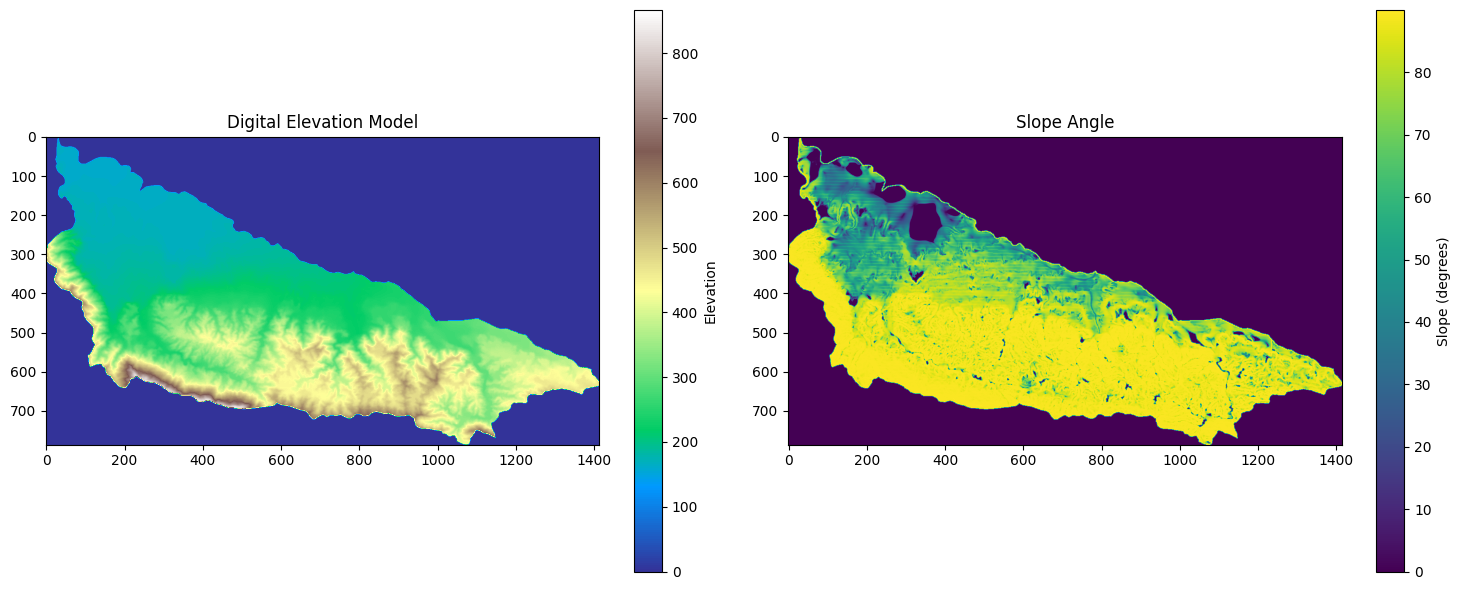

Factor of Safety (FOS): -13473028399796136.00


In [ ]:
def main():
    """
    Main script to perform landslide stability analysis.
    """
    # DEM path
    dem_path = "/content/CHITAWAN_Madi.tif"

    try:
        # Load DEM
        dem_array, dem = load_dem(dem_path)

        # Get DEM bounds
        bounds = dem.bounds
        min_x, min_y, max_x, max_y = bounds

        # Define soil properties (cohesion, friction angle, unit weight)
        soil_params = (10, 25, 18)

        # Define slip surface center and radius
        center_x = min_x + (max_x - min_x) * 0.5
        center_y = min_y + (max_y - min_y) * 0.5
        radius = min(max_x - min_x, max_y - min_y) * 0.1

        # Convert center coordinates to pixel coordinates
        center_row, center_col = dem.index(center_x, center_y)

        # Convert radius to pixel units
        radius_pixels = radius / dem.res[0]

        # Calculate slope
        slope_array = calculate_slope(dem_array)

        # Visualize DEM and slope
        plot_dem_and_slope(dem_array, slope_array)

        # Calculate Factor of Safety
        FOS = bishop_method(
            dem_array,
            dem.transform,
            center_col,
            center_row,
            radius_pixels,
            soil_params,
            num_slices=1000
        )

        print(f"Factor of Safety (FOS): {FOS:.2f}")

    except Exception as e:
        print(f"An error occurred during analysis: {e}")
    finally:
        # Ensure rasterio dataset is closed
        if 'dem' in locals():
            dem.close()

if __name__ == "__main__":
    main()
